# WeatherPy
----

#### Observable Trends
- Temperature is at its maximum when closest to the equator. With a peak slightly off of the equatorial line at around 20/30 degrees.

- Cloudiness and humidity do not show a strong correlation to latitude. The visualizations below show a great variety of values at similar latitutdes.

- Win speed appeears to slightly increase as we move away from the equator, but after running the numbers and generating multiple data sets the clearest trend comes from temperature.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Open API key
api_key = api_keys.api_key

# startng URL for API request
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [15]:
# Create variables and empty lists to append the API data 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=pevek
Processing Record 2 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=grindavik
Processing Record 3 | Yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=yeppoon
Processing Record 4 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=san cristobal
Processing Record 5 | Carauari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=carauari
Processing Record 6 | Luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=luganville
Processing Record 7 | Rikitea
http://api.openweathermap.org/data/2.5/weather?

Processing Record 58 | Kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=kattivakkam
City not found. Skipping...
Processing Record 59 | Wajir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=wajir
Processing Record 60 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=beyneu
Processing Record 61 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=severo-kurilsk
Processing Record 62 | Abonnema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=abonnema
Processing Record 63 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=namibe
Processing Record 64 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79

Processing Record 113 | Gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=gamba
Processing Record 114 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=saint-philippe
Processing Record 115 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=bereda
Processing Record 116 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=bredasdorp
Processing Record 117 | Hadejia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=hadejia
Processing Record 118 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=vestmannaeyjar
Processing Record 119 | Wonthaggi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39

Processing Record 169 | Bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=bud
Processing Record 170 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=santa maria
Processing Record 171 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=ribeira grande
Processing Record 172 | Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=wells
Processing Record 173 | Mbekenyera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=mbekenyera
City not found. Skipping...
Processing Record 174 | The Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=the valley
Processing Record 175 | Baiyin
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 224 | Batticaloa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=batticaloa
Processing Record 225 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=carnarvon
City not found. Skipping...
Processing Record 226 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=half moon bay
Processing Record 227 | Olga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=olga
Processing Record 228 | Poronaysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=poronaysk
City not found. Skipping...
City not found. Skipping...
Processing Record 229 | Te Karaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=te karaka
Processing Record 230 | Taltal
htt

Processing Record 278 | Garissa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=garissa
Processing Record 279 | Trelew
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=trelew
Processing Record 280 | Wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=wilmington
Processing Record 281 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=kirakira
City not found. Skipping...
Processing Record 282 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=port augusta
Processing Record 283 | Havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=havelock
Processing Record 284 | Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 333 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=sao filipe
Processing Record 334 | Merke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=merke
Processing Record 335 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=srednekolymsk
Processing Record 336 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=sambava
Processing Record 337 | Keuruu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=keuruu
Processing Record 338 | Cartagena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=cartagena
Processing Record 339 | Sioux Lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431

Processing Record 388 | Carlyle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=carlyle
City not found. Skipping...
Processing Record 389 | Lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=lerwick
Processing Record 390 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=pangnirtung
Processing Record 391 | Ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=ahipara
Processing Record 392 | Eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=eureka
Processing Record 393 | Atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=atherton
Processing Record 394 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089

Processing Record 443 | Marfino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=marfino
Processing Record 444 | Katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=katangli
Processing Record 445 | Zhuhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=zhuhai
City not found. Skipping...
Processing Record 446 | Kurumkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=kurumkan
Processing Record 447 | Lazurne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=lazurne
Processing Record 448 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=aasiaat
Processing Record 449 | Tabora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e

Processing Record 499 | Juba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=juba
Processing Record 500 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=baruun-urt
Processing Record 501 | Jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=jumla
Processing Record 502 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=kamenka
Processing Record 503 | Itacare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=itacare
Processing Record 504 | Derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=derzhavinsk
Processing Record 505 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=f

Processing Record 554 | Gorin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=gorin
City not found. Skipping...
Processing Record 555 | Douglas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=douglas
Processing Record 556 | Los Zacatones
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=los zacatones
Processing Record 557 | Coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eb79bd089a39e6779431ae67c93cd2a0&q=coihaique


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# make a dictionary for the lists to make into the eventual csv via the dataframe
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [17]:
# dataframe to csv to display
weather_data.to_csv('Weather_Data_Output/weather_data.csv')

# display
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pevek,81,RU,1562110565,96,69.70,170.27,35.40,12.03
1,Grindavik,75,IS,1562110567,87,63.84,-22.43,53.60,13.87
2,Yeppoon,20,AU,1562110026,64,-23.13,150.74,68.00,8.05
3,San Cristobal,66,HN,1562110569,55,14.68,-86.92,75.00,6.58
4,Carauari,57,BR,1562110571,97,-4.88,-66.90,72.84,3.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

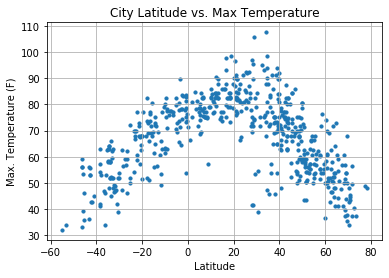

In [18]:
# plot latitude v. temperature plot; with labels_title
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

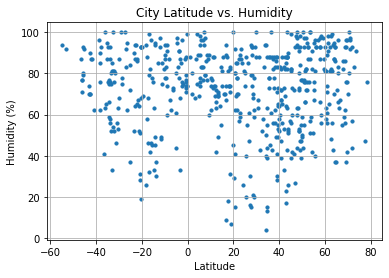

In [19]:
# latitude vs. Humdidity Plot 
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

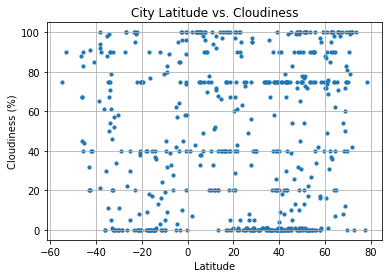

In [20]:
# plot latitude vs. cloudiness labels_title
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

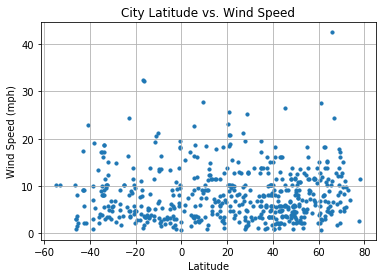

In [21]:
# plot latitude vs. wind speed plot labels_title
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

